Importing the libraries.

In [530]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier

Loading the dataset

In [531]:
df = pd.read_csv('ai4i2020 2.csv')

In [532]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Descriptives 

In [534]:
df.describe(include = 'all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Make a subset/ copy

In [535]:
df_subset = df.drop(columns = ['Air temperature [K]', 'UDI', 'Product ID', 'Type', 'Rotational speed [rpm]'])

In [536]:
df_subset.head(10)

,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,42.8,0,0,0,0,0,0,0
1,308.7,46.3,3,0,0,0,0,0,0
2,308.5,49.4,5,0,0,0,0,0,0
3,308.6,39.5,7,0,0,0,0,0,0
4,308.7,40.0,9,0,0,0,0,0,0
5,308.6,41.9,11,0,0,0,0,0,0
6,308.6,42.4,14,0,0,0,0,0,0
7,308.6,40.2,16,0,0,0,0,0,0
8,308.7,28.6,18,0,0,0,0,0,0
9,309.0,28.0,21,0,0,0,0,0,0


In [537]:
df_subset.head()

,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,42.8,0,0,0,0,0,0,0
1,308.7,46.3,3,0,0,0,0,0,0
2,308.5,49.4,5,0,0,0,0,0,0
3,308.6,39.5,7,0,0,0,0,0,0
4,308.7,40.0,9,0,0,0,0,0,0


## Setting the predictor variable(X) and the target variable(y).

In [538]:
X = df_subset[['Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']]
y = df_subset[['Machine failure']]

In [539]:
print(y)
print('')
print(X)

      Machine failure
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
9995                0
9996                0
9997                0
9998                0
9999                0

[10000 rows x 1 columns]

      Process temperature [K]  Torque [Nm]  Tool wear [min]
0                       308.6         42.8                0
1                       308.7         46.3                3
2                       308.5         49.4                5
3                       308.6         39.5                7
4                       308.7         40.0                9
...                       ...          ...              ...
9995                    308.4         29.5               14
9996                    308.4         31.8               17
9997                    308.6         33.4               22
9998                    308.7         48.5               25
9999                    308.7         40.2       

Splitting the data into training and testing. 

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [592]:
smote_een = SMOTEENN(random_state = 42)
X_res, y_res = smote_een.fit_resample(X_train, y_train)

Fitting the logistic regression model.

In [593]:
model = LogisticRegression(random_state = 42)

Using Multi-output classifier 

In [543]:
# multi_model = MultiOutputClassifier(model, n_jobs = 1)

Fitting the model

In [594]:
model.fit(X_res, y_res)

LogisticRegression(random_state=42)

Making predictions 

In [595]:
y_pred = model.predict(X_test)

Model evaluation

In [596]:
roc_auc = roc_auc_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
print('ROC-AUC score: ', roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      2428
           1       0.10      0.79      0.18        72

    accuracy                           0.79      2500
   macro avg       0.55      0.79      0.53      2500
weighted avg       0.97      0.79      0.86      2500

ROC-AUC score:  0.7901908292147172


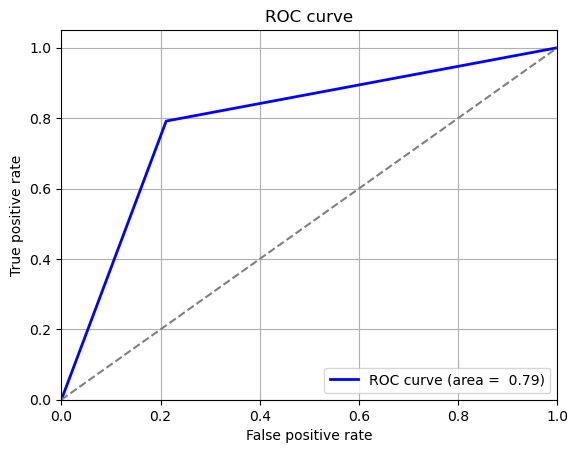

In [598]:
fpr, tpr, _= roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color= 'blue', lw= 2, label = f'ROC curve (area = {roc_auc : .2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

In [547]:
# for i, column in enumerate(y.columns):
#     print(f"--- Evaluation for {column} ---")
#     print("Accuracy:", accuracy_score(y_test.iloc[:, i], y_pred[:, i]))
#     print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

## 1. Decision Tree
###   Machine failure

In [599]:
df_subset_1 = df.drop(columns = ['Air temperature [K]', 'UDI', 'Product ID', 'Type'])

In [600]:
df_subset_1

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,308.4,1604,29.5,14,0,0,0,0,0,0
9996,308.4,1632,31.8,17,0,0,0,0,0,0
9997,308.6,1645,33.4,22,0,0,0,0,0,0
9998,308.7,1408,48.5,25,0,0,0,0,0,0


In [601]:
X = df_subset_1[['Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']]
y = df_subset_1['Machine failure']

In [551]:
# y = df_subset['Machine failure']

# X = df_subset.drop(columns = ['Machine failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'])

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [553]:
# undersampler = RandomUnderSampler(random_state= 42)
# X_sam, y_sam = undersampler.fit_resample(X_train, y_train)

In [554]:
# decision_tree = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
# decision_tree.fit(X_train, y_train)
# dt_pred = decision_tree.predict(X_test)

In [555]:
# print(metrics.classification_report(y_test, dt_pred))

In [556]:
# decision_tree = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
# decision_tree.fit(X_sam, y_sam)
# dt_pred = decision_tree.predict(X_test)
# print(metrics.classification_report(y_test, dt_pred))

In [557]:
# smote = SMOTE(random_state= 42)
# X_res, y_res = smote.fit_resample(X_train, y_train)

In [558]:
# decision_tree = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
# decision_tree.fit(X_res, y_res)
# dt_pred = decision_tree.predict(X_test)
# print(metrics.classification_report(y_test, dt_pred))

In [603]:
smote_een = SMOTEENN(random_state = 42)
X_res1, y_res1 = smote_een.fit_resample(X_train, y_train)

In [604]:
decision_tree = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
decision_tree.fit(X_res1, y_res1)
dt_pred = decision_tree.predict(X_test)
print(metrics.classification_report(y_test, dt_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC score: ', roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2428
           1       0.21      0.78      0.34        72

    accuracy                           0.91      2500
   macro avg       0.60      0.85      0.64      2500
weighted avg       0.97      0.91      0.93      2500

ROC-AUC score:  0.7901908292147172


In [605]:
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_1, tpr_1)

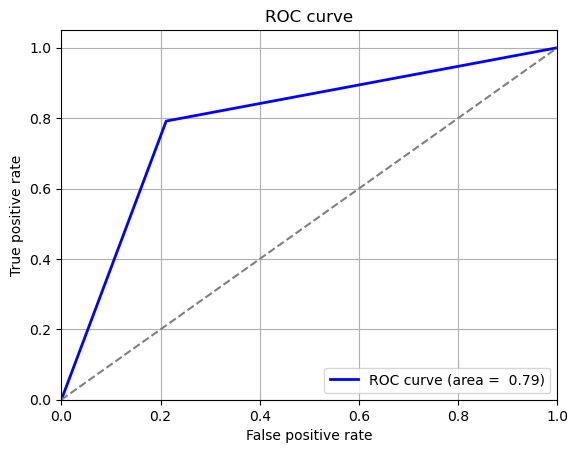

In [607]:
plt.plot(fpr_1, tpr_1, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc : .2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

In [561]:
scores =  cross_val_score(decision_tree, X_train, y_train)
scores

array([0.96333333, 0.95333333, 0.95866667, 0.958     , 0.96066667])

In [562]:
scores = cross_val_score(decision_tree, X_train, y_train, scoring = 'balanced_accuracy')
scores

array([0.70834257, 0.65771733, 0.71501219, 0.69298448, 0.6943676 ])

In [563]:
scores = cross_val_score(decision_tree, X_train, y_train, scoring = 'accuracy')
scores

array([0.96333333, 0.95333333, 0.95866667, 0.958     , 0.96066667])

In [564]:
scores = cross_val_score(decision_tree, X_train, y_train, scoring = 'recall')
scores

array([0.43396226, 0.33962264, 0.45283019, 0.40740741, 0.40740741])

In [565]:
scores = cross_val_score(decision_tree, X_train, y_train, scoring = 'precision')
scores

array([0.47916667, 0.33962264, 0.42105263, 0.41509434, 0.44897959])

In [566]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

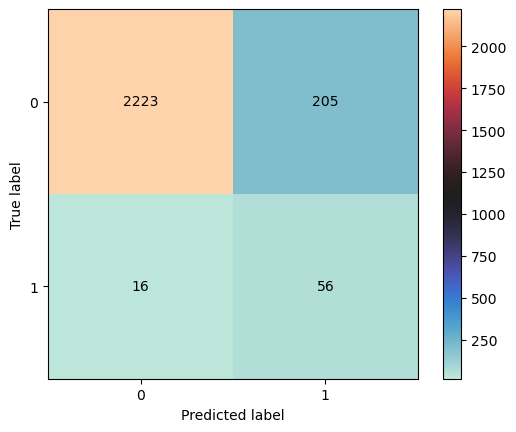

In [567]:
cm  = metrics.confusion_matrix(y_test, dt_pred,labels= decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=  cm, display_labels= decision_tree.classes_)
disp.plot(cmap = 'icefire');
for text in disp.ax_.texts:
    text.set_color('black')


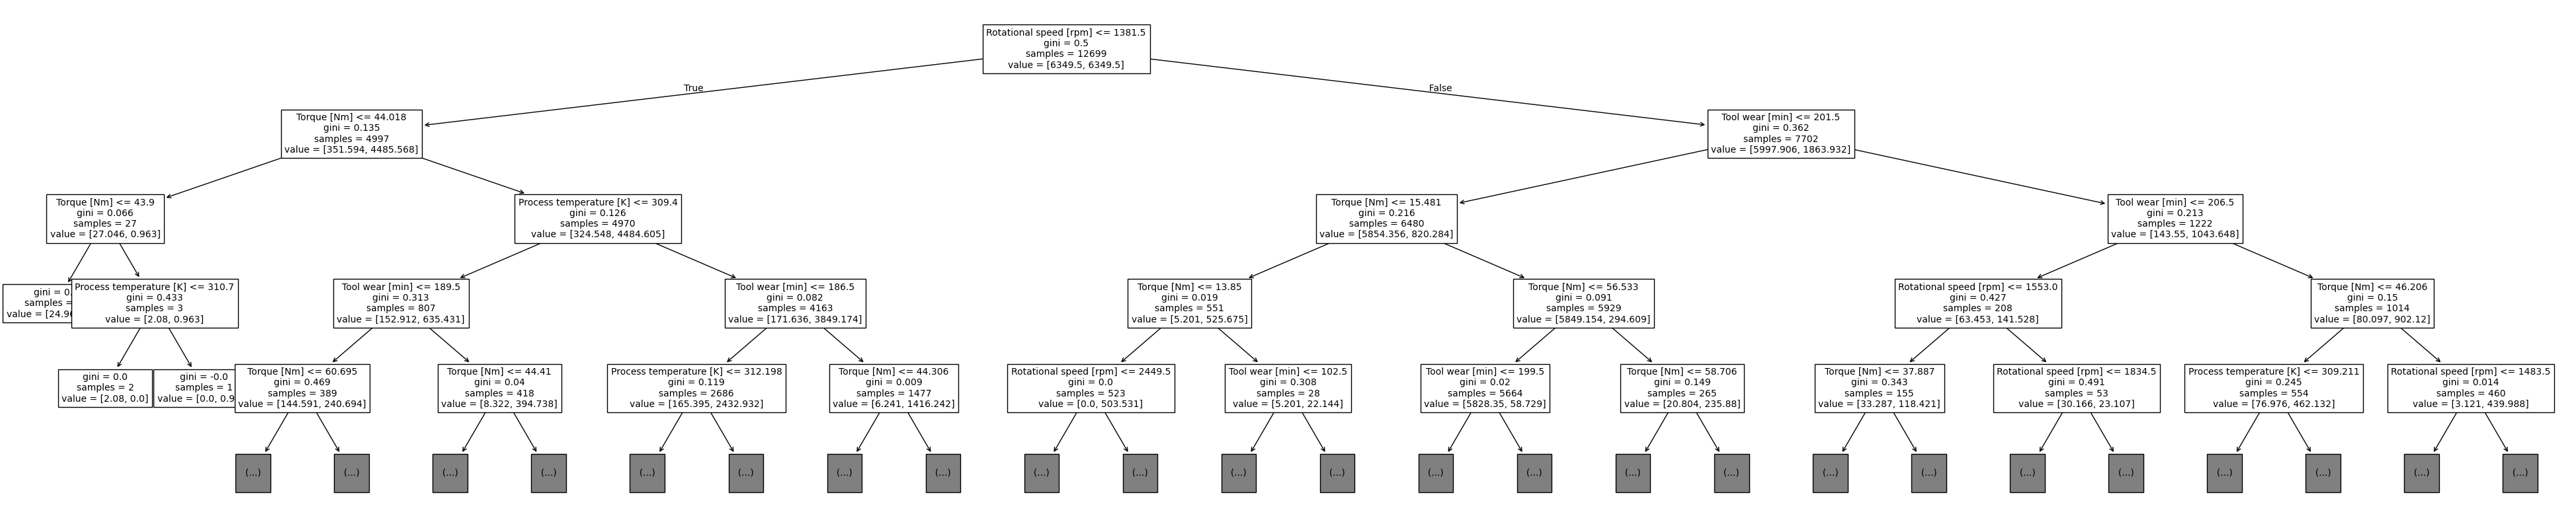

In [628]:
plt.figure(figsize = (50, 10))
plot_tree(decision_tree, max_depth= 4, feature_names= X.columns, fontsize=10);


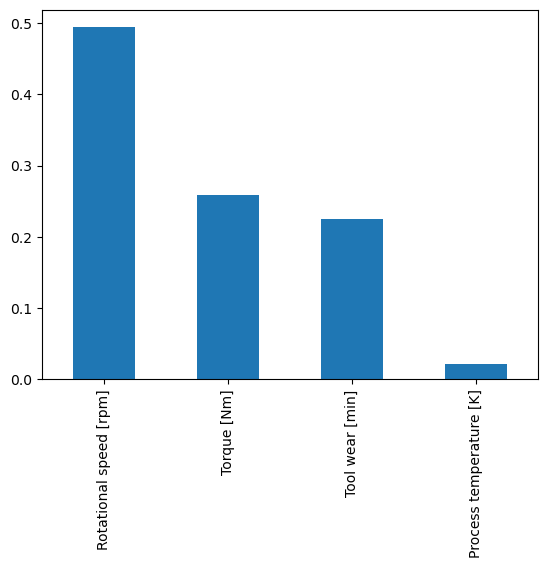

In [569]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index = X.columns).sort_values(ascending= False)
 
forest_importances.plot.bar();

In [570]:
forest_importances

Rotational speed [rpm]     0.494205
Torque [Nm]                0.259366
Tool wear [min]            0.224490
Process temperature [K]    0.021938
dtype: float64

## Random Forest 

In [571]:
# X_2 = df_subset_['']

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size= 0.25, random_state=42)

In [609]:
smote_een = SMOTEENN(random_state = 42)
X_res2, y_res2= smote_een.fit_resample(X_train, y_train)

In [610]:
cv_params = {'n_estimators' : [50, 100], 
             'max_depth': [10, 50],
             'min_samples_leaf': [0.5, 1], 
             'min_samples_split' : [0.001, 0.01], 
             'max_samples' : [0.5, 0.9]
             }

In [611]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [612]:
rf = RandomForestClassifier(random_state= 42)

In [613]:
# strat_kfold = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [614]:
rf_val = GridSearchCV(rf, cv_params, cv = strat_kfold, refit = 'f1', n_jobs= -1, verbose = 1)

In [615]:
rf_val.fit(X_res2, y_res2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [616]:
rf_val.best_params_

{'max_depth': 50,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [625]:
best_rf = rf_val.best_estimator_

In [617]:
rf_opt = RandomForestClassifier(n_estimators= 50, max_depth= 50, min_samples_leaf= 1, min_samples_split= 0.001, 
                                max_samples= 0.9, random_state= 42)

In [618]:
rf_opt.fit(X_res2, y_res2)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=42)

In [619]:
y_pred = rf_opt.predict(X_test)

In [620]:
print(metrics.classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC score: ', roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2428
           1       0.21      0.88      0.34        72

    accuracy                           0.90      2500
   macro avg       0.60      0.89      0.65      2500
weighted avg       0.97      0.90      0.93      2500

ROC-AUC score:  0.8897240527182866


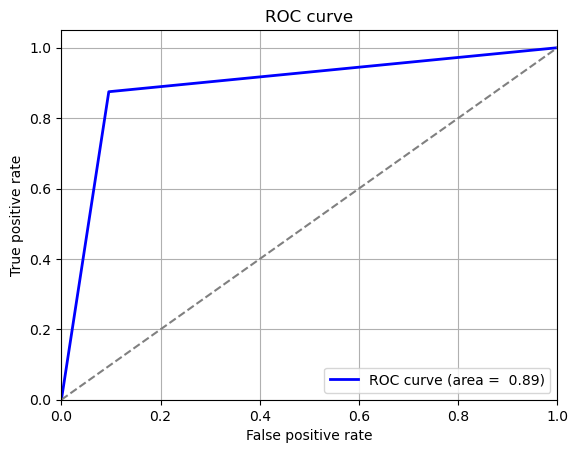

In [622]:
fpr_2, tpr_2, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_2, tpr_2)
plt.plot(fpr_2, tpr_2, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color= 'gray', linestyle ='--', )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

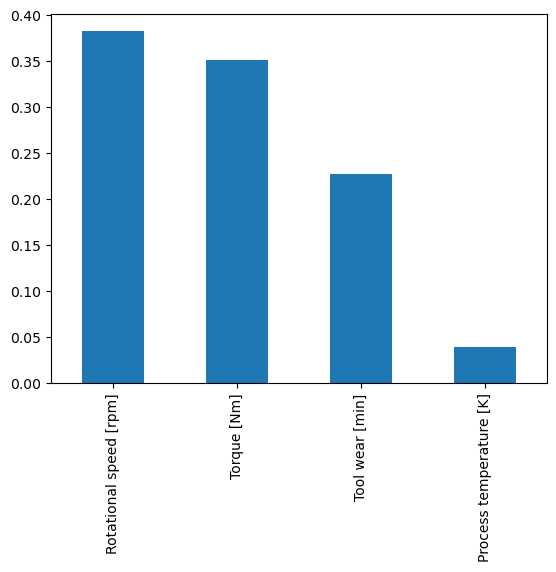

In [626]:
importances = best_rf.feature_importances_
forest_importances = pd.Series(importances, index = X.columns).sort_values(ascending= False)
 
forest_importances.plot.bar();